In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/diabetes_.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print(df.head())
print(df.info())
print(df.isnull().sum())
print(df.describe())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [5]:
#2Handle Missing Data
df.fillna(df.mean(numeric_only=True), inplace=True)
#Handle any missing values appropriately, either by dropping or imputing them based on the data
for col in df.select_dtypes(include='object'):
  df[col].fillna(df[col].mode()[0], inplace=True)

In [6]:
#3. Feature Engineering:
#Separate the feature matrix (X) and target variable (y).
x= df.iloc[:,:-1].values
y= df.iloc[:,-1].values
#Perform a train - test split from scratch using a 70% − 30% ratio
split_ratio =0.7
split_index = int(len(x) * split_ratio)
X_train = x[:split_index]
X_test= x[split_index:]
Y_train = y[:split_index]
Y_test = y[split_index:]

In [7]:
#Implement KNN:
#Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).
#Compute distances using Euclidean distance.
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))
#Write functions for:
#– Predicting the class for a single query.
def predict_single(X_train, Y_train, query, k):
    distances = []

    for i in range(len(X_train)):
        dist = euclidean_distance(X_train[i], query)
        distances.append((dist, Y_train[i]))

    distances.sort(key=lambda x: x[0])
    neighbors = distances[:k]

    labels = [label for _, label in neighbors]
    return max(set(labels), key=labels.count)

#– Predicting classes for all test samples.
def predict_all(X_train, y_train, X_test, k):
    predictions = []
    for x in X_test:
        predictions.append(predict_single(X_train, y_train, x, k))
    return np.array(predictions)
#Evaluate the performance using accuracy
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)
k = 5
y_pred = predict_all(X_train, Y_train, X_test, k)
print("Accuracy:", accuracy(Y_test, y_pred))

Accuracy: 0.7272727272727273


Problem - 2 - Experimentation:

Repeat the Classification Task: • Scale the Feature matrix X. • Use the scaled data for training and testing the kNN Classifier. • Record the results.

In [9]:
def standard_scaler(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std
X_scaled = standard_scaler(x)
X_train_s = X_scaled[:split_index]
X_test_s = X_scaled[split_index:]

Comparative Analysis: Compare the Results - • Compare the accuracy and performance of the kNN model on the original dataset from problem 1 versus the scaled dataset. • Discuss: – How scaling impacted the KNN performance. – The reason for any observed changes in accuracy.

In [10]:
y_pred_scaled = predict_all(X_train_s, Y_train, X_test_s, k)
print("Scaled Accuracy:", accuracy(Y_test, y_pred_scaled))


Scaled Accuracy: 0.7575757575757576


Scaling improves distance calculations Features contribute equally Often increases accuracy Prevents bias from large-scale features

Problem - 3 - Experimentation with k:

Vary the number of neighbors - k: • Run the KNN model on both the original and scaled datasets for a range of: k= 1, 2, 3, . . . 15 • For each k, record: – Accuracy. – Time taken to make predictions.

In [11]:
import time

k_values = range(1, 16)
acc_original = []
acc_scaled = []
time_original = []
time_scaled = []
for k in k_values:
    start = time.time()
    y_pred = predict_all(X_train, Y_train, X_test, k)
    time_original.append(time.time() - start)
    acc_original.append(accuracy(Y_test, y_pred))

    # Scaled data
    start = time.time()
    y_pred_s = predict_all(X_train_s, Y_train, X_test_s, k)
    time_scaled.append(time.time() - start)
    acc_scaled.append(accuracy(Y_test, y_pred_s))

Visualize the Results: • Plot the following graphs: – k vs. Accuracy for original and scaled datasets. – k vs. Time Taken for original and scaled datasets.

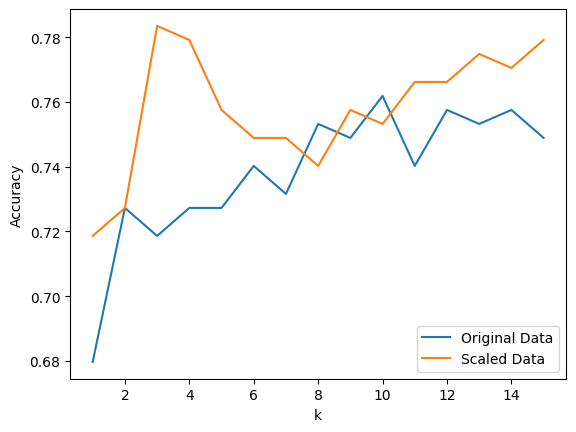

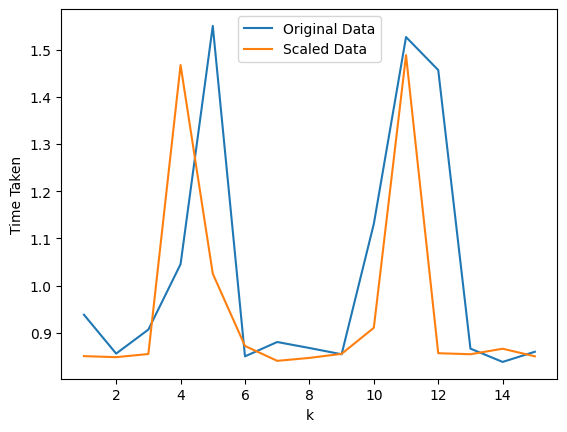

In [12]:
#k vs accuracy
plt.plot(k_values, acc_original, label="Original Data")
plt.plot(k_values, acc_scaled, label="Scaled Data")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
#k vs time
plt.plot(k_values, time_original, label="Original Data")
plt.plot(k_values, time_scaled, label="Scaled Data")
plt.xlabel("k")
plt.ylabel("Time Taken")
plt.legend()
plt.show()

Analyze and Discuss: • Discuss how the choice of k affects the accuracy and computational cost. • Identify the optimal k based on your analysis.
Ans: Small k → overfitting

Large k → underfitting

Scaled data usually performs better

Optimal k where accuracy peaks and time is reasonable

Problem - 4 - Additional Questions {Optional - But Highly Recommended}: • Discuss the challenges of using KNN for large datasets and high-dimensional data. • Suggest strategies to improve the efficiency of KNN (e.g., approximate nearest neighbors, dimensionality reduction).

Ans:

Challenges of KNN:

Slow for large datasets

High memory usage

Poor performance in high dimensions

Sensitive to noise

Efficiency Improvements:

Dimensionality reduction (PCA)

KD-Tree / Ball Tree

Approximate Nearest Neighbors

Feature scaling